In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('ProjectDataProcessed.csv')
uData = pd.read_csv('../ProjectData (3rd run).csv')

def sortBarPlot(df, xCol, yCol, ascending):
    result = df.groupby([xCol])[yCol].aggregate(np.mean).reset_index().sort_values(yCol, ascending=ascending)
    return result

def removeOutliers(df, columnName):
    return df[((df[columnName] - df[columnName].mean()) / df[columnName].std()).abs() < 3]

 #scale types{"linear", "log", "symlog", "logit"}
def setScale2(plot, x, y):
    plot.set(xscale=x)
    plot.set(yscale=y)
    return plot

def setScale(plot, scale):
    plot.set(xscale=scale)
    plot.set(yscale=scale)
    return plot
def setScaleLog(plot):
    plot.set(xscale='log')
    plot.set(yscale='log')
    return plot


data.head(20)

#try making wordcloud with library



,Unnamed: 0,commitHistory,fork,about,branches,license,contributors,url,commits,watch,releases,library,star,packages,commitsLink,readmeLength
0,0,NaN,1,NaN,1,No License,4,https://github.com//fbeilstein/machine_learning,1728,2,0,scikit-learn,4,0,https://github.com//fbeilstein/machine_learnin...,16972.0
1,1,NaN,1,NaN,1,No License,4,https://github.com//fbeilstein/machine_learning,1728,2,0,scipy,4,0,https://github.com//fbeilstein/machine_learnin...,16972.0
2,2,NaN,1,NaN,1,No License,4,https://github.com//fbeilstein/machine_learning,1728,2,0,numpy,4,0,https://github.com//fbeilstein/machine_learnin...,16972.0
3,3,NaN,1,NaN,1,No License,4,https://github.com//fbeilstein/machine_learning,1728,2,0,pandas,4,0,https://github.com//fbeilstein/machine_learnin...,16972.0
4,4,NaN,9,An R package with Python integration for multi...,2,Custom,-1,https://github.com//nredell/forecastML,230,1,0,numpy,32,0,https://github.com//nredell/forecastML/commits...,8242.0
5,5,NaN,9,An R package with Python integration for multi...,2,Custom,-1,https://github.com//nredell/forecastML,230,1,0,pandas,32,0,https://github.com//nredell/forecastML/commits...,8242.0
6,6,NaN,5,This project includes following repositories P...,1,No License,-1,https://github.com/guptapiyush340/Soybean-Pric...,49,3,0,XG Boost,1,0,https://github.com//guptapiyush340/Soybean-Pri...,4862.0
7,7,NaN,1,Polynomial regression with sklearn as an intro...,1,No License,-1,https://github.com//CHS-AI-Club/Machine-Learni...,7,0,0,numpy,1,0,https://github.com//CHS-AI-Club/Machine-Learni...,1293.0
8,8,NaN,1,Polynomial regression with sklearn as an intro...,1,No License,-1,https://github.com//CHS-AI-Club/Machine-Learni...,7,0,0,pandas,1,0,https://github.com//CHS-AI-Club/Machine-Learni...,1293.0
9,9,NaN,21,A Python package that implements a variety of ...,10,mit,-1,https://github.com//fairlearn/fairlearn,276,10,4,numpy,143,0,https://github.com//fairlearn/fairlearn/commit...,7915.0


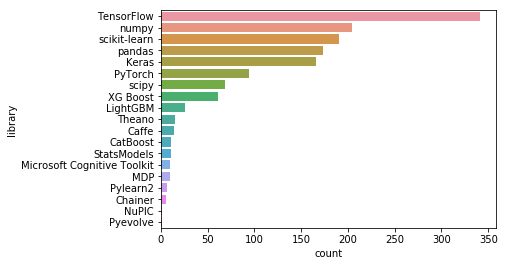

In [2]:
# bar plot of programming languages
sns.countplot(y='library', data= data, order=data['library'].value_counts().index)

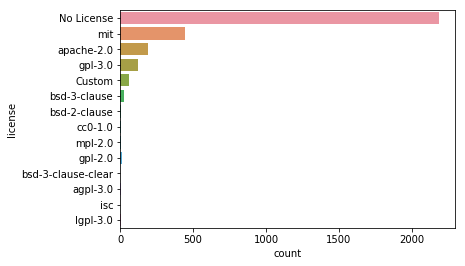

In [3]:
# 1. bar plot of licenses
#sns.barplot(x='license' ,y='library')
#df = footballers[footballers['Position'].isin(['ST', 'GK'])]
#g = sns.FacetGrid(data, col="license", col_wrap = 6)
#g.map(sns.countplot, "library")

sns.countplot(y='license', data= uData, order = data['license'].value_counts().index)

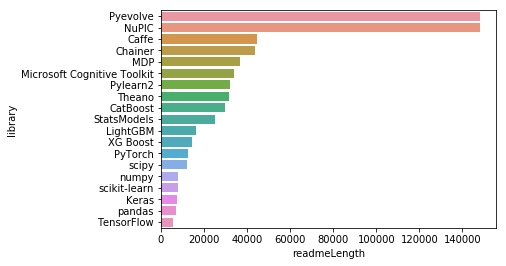

In [4]:
# 2. average readme length by language
sns.barplot(y='library', x='readmeLength', data= sortBarPlot(data,'library', 'readmeLength', False))

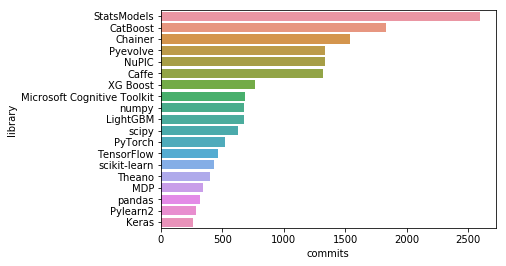

In [5]:
# 3. commits by language
sns.barplot(y='library', x='commits', data= sortBarPlot(data,'library', 'commits', False))


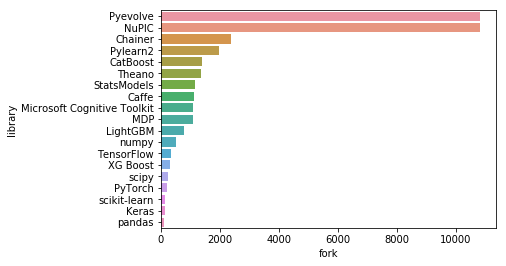

In [6]:
# 4. forks by language
sns.barplot(y='library', x='fork', data= sortBarPlot(data,'library', 'fork', False))

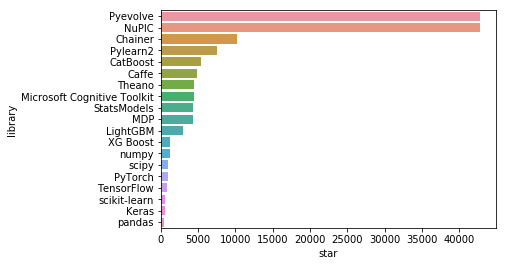

In [7]:
# 5. stars by language
sns.barplot(y='library', x='star', data= sortBarPlot(data,'library', 'star', False))

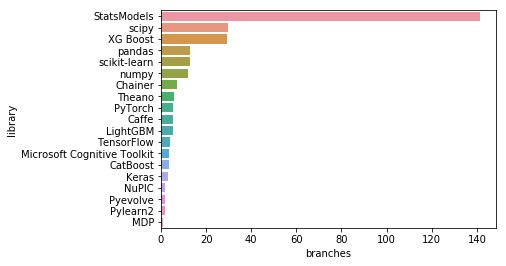

In [8]:
#6 branches by language
sns.barplot(y='library', x='branches', data= sortBarPlot(data,'library', 'branches', False))

        index  license
0  No License     2187
1         mit      444
2  apache-2.0      192
3     gpl-3.0      119
4      Custom       60


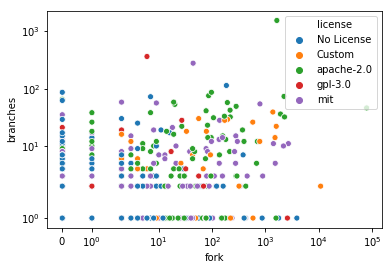

In [17]:
# forks/branches vs license
top5 = uData['license'].value_counts().reset_index().sort_values('license', ascending=False)[0:5]


print(top5)
lData = uData[uData['license'].isin(top5['index'])]

#remove outliers
#lData = removeOutliers(lData, 'fork')
#lData = removeOutliers(lData, 'branches')

plot = sns.scatterplot(x='fork', y='branches', data=lData, hue='license')

setScale2(plot,'symlog','symlog')

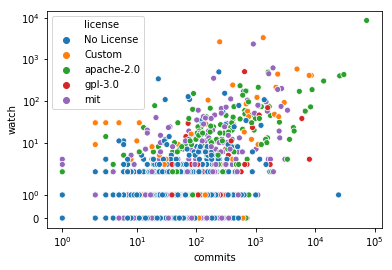

In [10]:
#commits vs watch/releases
plot = sns.scatterplot(x='commits', y='watch', data=lData, hue='license')
setScale2(plot, 'symlog','symlog')



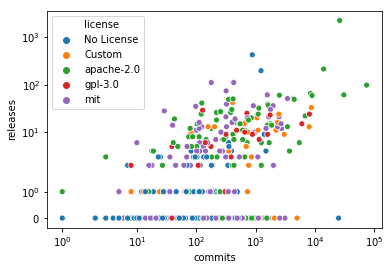

In [11]:
plot = sns.scatterplot(x='commits', y='releases', data=lData, hue='license')
setScale2(plot,'symlog','symlog')

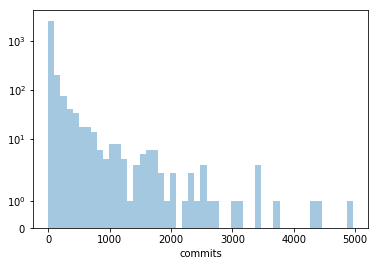

In [50]:
#histogram of commits
#plot = uData
plot = removeOutliers(uData,'commits')
plot = sns.distplot(plot['commits'], kde=False)


setScale2(plot,'linear','symlog')

# use logarithmic bins



#histogram of commits

# import math
# logs = data['commits'].apply(lambda x: math.log(x,10))


# plot = sns.distplot(logs, kde=False)
# setScale2(plot,'linear','symlog')

# # use logarithmic bins


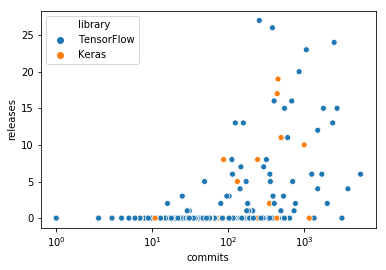

In [51]:
#tensorflow vs. Karas

tvk = data[data['library'].isin(['Keras','TensorFlow'])]
tvk = removeOutliers(tvk,'commits')
tvk = removeOutliers(tvk,'releases')

plot = sns.scatterplot(x='commits', y='releases', data=tvk, hue = 'library')
setScale2(plot,'symlog','linear')

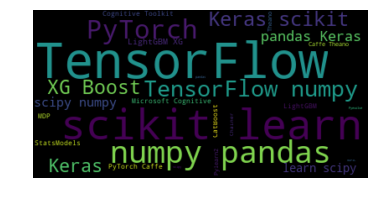

In [26]:
import sys
#!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud


from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=' '.join( data['library'].tolist())

# Create the wordcloud object
wordcloud = WordCloud().generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
